1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Layer conv2d activation shape: (1, 46, 46, 32)
Layer conv2d_1 activation shape: (1, 21, 21, 64)
Layer conv2d_2 activation shape: (1, 8, 8, 128)
Layer conv2d_3 activation shape: (1, 2, 2, 256)


IndexError: index 128 is out of bounds for axis 3 with size 128

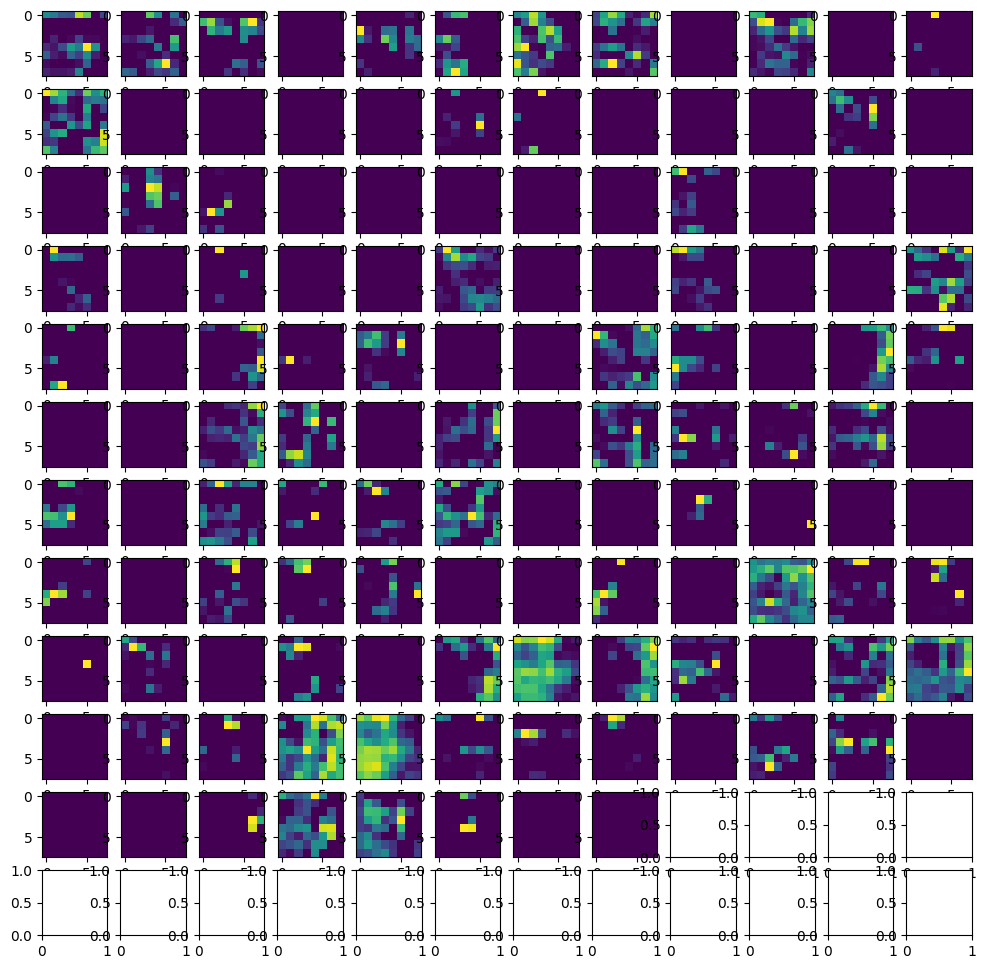

In [4]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
import matplotlib.pyplot as plt

# Load the pre-trained age and gender detection model
model_path = r'c:\Users\91766\Desktop\age_gender_detector\Age_Sex_Detection.keras'  # Replace with the correct path to your model file
model = load_model(model_path)

# Define the layers you want to inspect
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3']
layer_outputs = [model.get_layer(name).output for name in layer_names]

# Create a new model that will return these outputs, given the model input
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Preprocess the input image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (48, 48))  # Resize to match model input size
    normalized_image = resized_image / 255.0  # Normalize pixel values
    return np.expand_dims(normalized_image, axis=0)  # Add batch dimension

# Path to the input image
image_path = r'c:\Users\91766\Desktop\age_gender_detector\18_1_0_20170109213102446.jpg.chip.jpg'  # Replace with the path to your input image

# Preprocess the image
preprocessed_image = preprocess_image(image_path)

# Get the activations
activations = activation_model.predict(preprocessed_image)

# Display the shapes of the activations for verification
for idx, activation in enumerate(activations):
    print(f"Layer {layer_names[idx]} activation shape: {activation.shape}")

# Function to visualize the activations
def display_activation(activation, col_size, row_size, act_index): 
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(12,12))
    for row in range(0, row_size): 
        for col in range(0, col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='viridis')
            activation_index += 1
            if activation_index >= activation.shape[-1]:  # Avoid out of index error
                break
    plt.show()

# Visualize the activations of the first convolutional layer
layer_num = 2 # Change this to visualize different layers
activation = activations[layer_num]
num_features = activation.shape[-1]
grid_size = int(np.ceil(np.sqrt(num_features)))
display_activation(activation, grid_size, grid_size, layer_num)
